A simple linear regression attempts to model the form of: $$\hat{y}_i = w_0 + w_1x_i + \epsilon$$ where $x_i$ is the $i$-th observation and $\hat{y}_i$ is the prediction corresponding to $x_i$ and $\epsilon$ is the irreducible error

A linear regression model must adhere to four assumptions:

1.) The relationship between the dependent variable $y$ and the predictor variable $x_1$ must be linear

2.) the residuals(or error) between our predicted values and the observations must be homoskedastic(or constant variance)

3.) The residuals must be independent, i.e. not autocorrelated.

4.) The residuals should be normally distributed(but note that the gauss-markov theorem assures us that as long as the residuals follow the above two assumptions, as long as they have a mean of 0 then OLS(ordinary least-squares) will still be the best linear unbiased estimator)

In order to find the best predictions when using linear regression, we must minimize the error of our model.  We define a cost function: $$J = \sum\limits_{i=1}^{N} (y_i - \hat{y}_i)^2$$

Substituting $\hat{y}_i = w_0 + w_1x_i$ for $\hat{y}_i$, then taking the derivative with respect to $w_0$ and setting it to 0, we can algebraically solve for $w_0$ and $w_1$

$w_0 = \bar{y} - \beta_1\bar{x}$

$w_1 = \frac{SS_{xy}}{SS_{xx}}$ 

Where $SS_{xy}$ and $SS_{xx}$ are the sum of the cross-deviations of x and y and the squared deviations of x, respectively 

$SS_{xy} = \sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y}) =  \sum_{i=1}^{n} y_ix_i - n\bar{x}\bar{y}$ 
  
$SS_{xx} = \sum_{i=1}^{n} (x_i-\bar{x})^2 =  \sum_{i=1}^{n}x_i^2 - n(\bar{x})^2$ 

How can we measure how well our model fits the data?  The $R^2$ score tells us the "goodness of fit," or how well the data is explained by our model $$R^2 = \frac{TSS-RSS}{TSS}$$

Where $TSS = \sum\limits_{i=1}^{N} (y_i - \bar{y})^2$ and $RSS = \sum\limits_{i=1}^{N} (y_i - \hat{y})^2$


As you can see, TSS is the variance in the data, and RSS is the variance of our predicted values. Alternatively: $$R^2 = 1 - \frac{\sum\limits_{i=1}^{N} (y_i - \hat{y}_i)^2}{\sum\limits_{i=1}^{N} (y_i - \hat{y}_i)^2}$$

$R^2$ score can range from 0 to 1, with 0 indicating that our model does no better than predicting the mean of $y$ and a value of 1 indicating that our model perfectly explains everything in the data except for the irreducible error, $\epsilon$

### Coding a simple linear regression

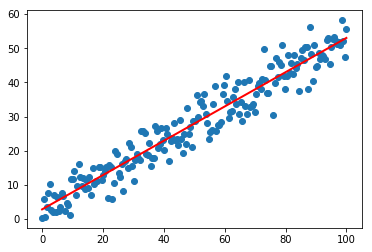

In [12]:
import numpy as np
import matplotlib.pyplot as plt


X = np.linspace(0, 100, 200)
y = 0.5 * X + 3 + np.random.normal(scale = 4, size = 200)

d = np.mean(X **2) - np.mean(X)**2

w0 = (np.mean(y)*np.mean(X**2)-np.mean(X)*np.mean(X*y))/d
w1 = (np.mean(X*y) - np.mean(X) * np.mean(y))/d

y_hat = w0 + w1*X

plt.scatter(X, y)
plt.plot(X, y_hat, color = 'r', linewidth = 2)
plt.show()

def r2(y, y_hat):
    return 1 - np.sum((y-y_hat) ** 2) / np.sum((y - np.mean(y)) ** 2)


plt.show()

In [13]:
r2(y, y_hat)
print('The R2 score is {}'.format(r2))

The R2 score is <function r2 at 0x11e019ae8>


### 2.) Multiple linear regression

A multiple linear regression is modeled as: $\hat{y}_i = w_0 + w_1x_i +\ldots w_jx_D$ or $$\hat{y}_i = w_0 + \sum\limits_{i=1}^{D} w_jx_{i,j} + \epsilon$$ where $\hat{y}_i$ is the $i$-th prediction corresponding to the $i$-th observation of all of the $D$ explanatory variables, and $x_{i,j}$ is the $i$-th observation of the $j$-th explanatory variable or feature

If we recall the definition of the dot product: $u\cdot v = \sum\limits_{i=1}^{D} u_iv_i$ which if we assume the convention that $u$ and $v$ are column vectors is equivalent to: $u\cdot v = u^T v$

if we introduce an explanitory variable, $x_0$ which always have the value 1- we can express the model as: $\hat{y}_i = w^Tx_i$ now we can collect our features into a matrix, $X$, with each row corresponding to an observation and each column corresponding to a feature.  Since the dot product is commutative, we can write $$\hat{y} = Xw$$

Where $\hat{y}$ is a $Nx1$ column vector containing all of our predictions, $X$ is an $NxD+1$ matrix containing all the observations for all $D+1$ features, and $w$ is a $D+1x1$ vector containing the model weights, or coefficients

Our goal is still to minimize our cost(or loss, or error) function $J(w_0, ... ,w_D) = \sum\limits_{i=1}^{N}(y_i - \hat{y}_i)^2$ remembering that $y$ and $\hat{y}$ are now column vectors, our loss function is equivalent to the dot product: $J(w) = (y-\hat{y})^T(y-\hat{y})$ Setting the derivative equal to $0$ and solving for $w$, we get: $$w = (X^TX)^{-1}X^Ty$$ also known as the Normal equation

### Coding a multiple linear regression

In [3]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

x_0 = np.ones(300)
x_1 = np.linspace(-100, 100, 300)
x_2 = np.linspace(-50, 100, 300)

y = 0.4 *x_1 + 0.5 *x_2 + 4 * x_0+ np.random.normal(scale = 20, size = 300)
X = []
for count in range(300):
    X.append([x_0[count], x_1[count], x_2[count]])
X = np.array(X)
 

w = np.linalg.solve(np.dot(X.T, X),
                    np.dot(X.T, y))
y_hat = np.dot(X, w)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,1], X[:,2], y)
ax.plot(X[:,1], X[:,2], y_hat, color='r')


plt.show()

r2 = r2(y, y_hat)

print("The R-squared value is: {}".format(r2))

### 3.) General Linear Models- GLMS and basis functions

So far we have assumed that our features have been linear in $X$ however, even we can also model non-linear functions as a linear combination of functions $\rho_0, \rho_1, ..., \rho_p$ that form a basis, or span, the non-linear relationships $x_1,...,x_D$ we can express these non-linear relationships as a linear function of the functions $\rho_0, \rho_1, ..., \rho_p$ as $$\hat{y} = f(x) = \sum\limits_{i=0}^{P} w_i\rho_i(x)$$

the linear regressions we have fitted so far have simply been a specific case where the basis functions are the identity $\rho(x) = x$

consider the one-dimensional case where we can set $\rho_i(x) = x^i$ for $i\in[0,P]$, and so $f$ is chosen from the set of polynomials of degree $P$ or less.. $\hat{y} = \sum\limits_{i=0}^{P} w_ix^i$ 
of course, this will expand the feature space, because one variable, $x$ is being replaced with many variables $\rho_i(x)$

The number of basis functions for each observed covariate is the degress of freedom

The general solution for many basis functions $\rho_0, \rho_1, ..., \rho_p$ will be the same form as the Normal equation

If we have the matrix $$\Phi = \begin{bmatrix} \rho_0(x_1) &\rho_1(x_1) &... &\rho_p(x_1)\\ 
                                               \rho_0(x_2) &\rho_1(x_2) &... &\rho_p(x_2)\\
                                               \vdots &\vdots &\ddots &\vdots\\
                                               \rho_0(x_N) &\rho_1(x_N) &... &\rho_p(x_N)\\
                               \end{bmatrix}$$
                                               

Then, just like before, we can write our model as $\hat{y} = \Phi w$ and we can follow the same procedure to arrive at the solution for the generalized normal equation $$w = (\Phi^T\Phi)^{-1}\Phi^Ty$$

### Coding a simple polynomial regression 

R-squared: 0.9985455361027551


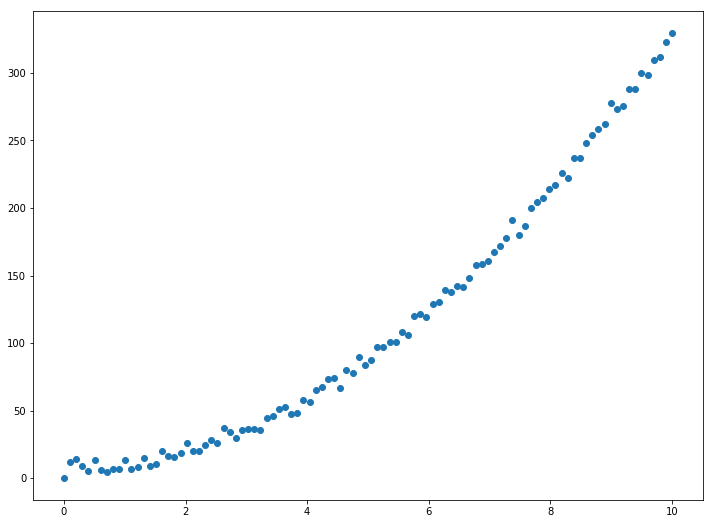

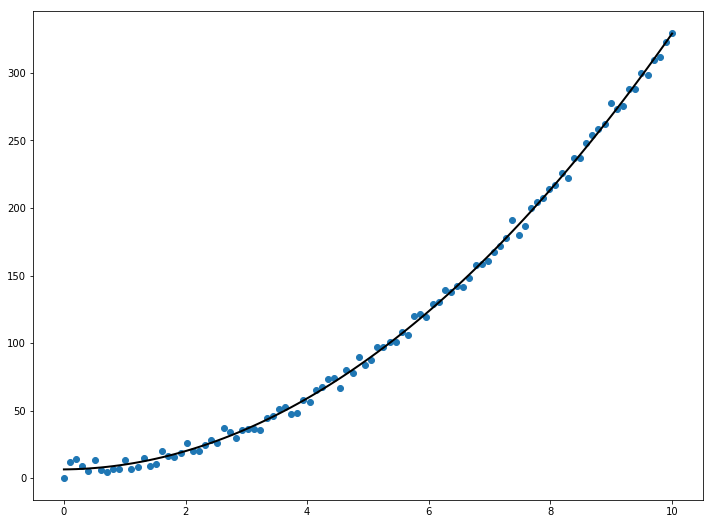

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 10, 100)
y = 4.9 + 1.2*x + 3.11456*x**2 + np.random.randn(100)*4

plt.figure(figsize = (12,9))
plt.scatter(x, y)

PHI = np.vstack((np.array([1]*100), x, x**2)).T

PHI[:10,:]

w = np.linalg.solve(PHI.T.dot(PHI), PHI.T.dot(y))

y_hat = PHI.dot(w)

plt.figure(figsize = (12,9))
plt.scatter(x, y)
plt.plot(x, y_hat, color = "black", linewidth = 2)

R2 = 1 - (y - y_hat).dot(y - y_hat) / (y - y.mean()).dot(y - y.mean())

print("R-squared: {}".format(R2))

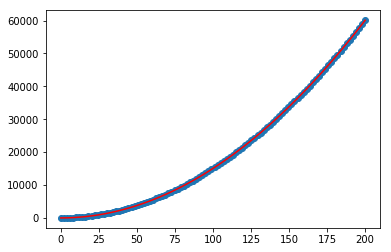

In [11]:
x_0 = np.ones(100)
x_1 = np.linspace(0, 200, 100)
x_sq = x_1**2
y = 0.9 * x_0  + 0.4 * x_1 + 1.5 * x_sq + np.random.normal(loc = 0, scale = 1, size = 100)

X = []
for count in range(100):
    X.append([x_0[count], x_1[count], x_sq[count]])
X = np.array(X)

w = np.linalg.solve(np.dot(X.T, X), 
                    np.dot(X.T, y))
y_hat = np.dot(X, w)

plt.scatter(X[:,1],y)
plt.plot(X[:,1], y_hat, color = 'r')

           

#r2 = r2(y, y_hat)

#print('The R-Squared value is: {}'.format(#r2)

### 4.) Interpretation of linear regression

recall our formula: $\hat{y}_i = w_0 + w_1x_i +\ldots w_jx_D$ 
$w_0$ is the bias term, which is the value of y when all the coefficients are 0, i.e. when $\rho(x) = 0$
any other weight($w_1, \ldots, w_j$) gives the rate of change in $y$ for a unit change in the corresponding function $\rho(x)$

In machine learning we want our model to be able to generalize to new data, data it hasn't seen before.  Recall from mathematics that any function can be approximated with a Taylor series if we keep adding terms to it.  Why then, is this a bad approach when trying to optimize our machine learning models' generalization abilities? 

In supervised machine learning, in order to test how well our model generalizes, we split the data into a training and test set

Improving our model's performance on the training data will improve how well our model generalizes, up to a certain point.  But eventually if we fit our model TOO strongly to the training data, we will start to notice a decrease in performace on new, unseen data.  

## Bias and Variance

Whenever we're fitting models, we're going to run into problems.  Usually we run into problems related to **high bias**, or **high variance**.  In other words, we're talking about an **underfitting** or **overfitting** problem.  It's likely that you have a problem that entails something along the spectrum of **bias** and **variance** that could inform some strategy to improve our model(s) performance.

Common stragies for dealing with **bias** and **variance**.

- Get more data
- Get a better sample of data
- Increase complexity of model
- Decrease complexity of model
- Regularize

The goal we typically have in mind with modeling is to **generalize** our estimations well.  Understanding the **bias** and **variance** tradeoff helps us understand **underfitting** and **overfitting**.


The expected values of SSE, decomposes into 3 components:

1. **Bias** (aka $bias^2$)
> $(E[\hat{y}] - y)^2$
>
> How much predicted values differ from true values.
1. **Variance** 
> $E[\hat{y} - E[\hat{y}]]^2$
>
> How much do predictions differ. 
1. **$\sigma^2$** - Irreducible Error

<center><h2> $E[SSE] = \text{bias}^2 + variance + \sigma^2$</h2></center>


> **Irreducible error(s):**
>
> - Error that cannot be reduced by model improvement.
> - Error due to randomness or natural variability in an existing system.

![bias_variance](biasvariance.png "Bias and variance")

### Suppose we want to build a model to best predict "price" using "size".

#### Bias

- No bias: On average, our predictions are correct.
- As bias increases, our predictions, on average, get more and more incorrect.

#### Variance

- No variance: Our predictions consistently hit the same value.
- As variance increases, our predictions get more and more spread out.

![](partitions-underfitting-vs-overfitting-regression-via-polynomial-degree.png)

## Bias-Variance Terminology

- **Bias**: The average difference between our model $\hat{y}$ and the truth $y$.
- **Variance**: The amount of variation in our model.


### High Bias Model
- Low accuracy

Diagnosis:  _Underfit_

### High Variance Model
- High accuracy

Diagnosis: _Overfit_

## Bias-Variance Terminology

- **Bias**: The average difference between our model $\hat{y}$ and the truth $y$.
- **Variance**: The amount of variation in our model.


### High Bias Model
- Low accuracy

Diagnosis:  _Underfit_

### High Variance Model
- High accuracy

Diagnosis: _Overfit_

## Why Does Bias Occur?
<img src="highbias.png" width="300">


- Our model is too simple for our data.
- On average, our model $\hat{y}$ is going to be far from the truth $y$.
- For example, I tried to model a curved relationship with a straight line.
- When we rely on simplifying assumptions that aren’t valid (i.e.linearity), we can run into high bias.
 - Linear regression is an method where we might suffer from high bias.

## Why Does Variance Occur?

<img src="highvariance.png" width = '300'>

Basically, more variance points us to believe our model is too complex.

- Our model $\hat{y}$ matches our data too closely.
- May not perform well on data it hasn't seen yet.
- We may not have enough data.
- Our model may "fit" very well to data it's seen, but not generalize well to data it hasn't.



## The Tradeoff

One goal of predictive modeling is to find the optimal "sweet spot" in which we minimize our error.  One common strategy that we'll learn deals with **cross-validation**, which entails testing the accuracy of our model on unseen data, then evaluating if it's overfit or not.  Ideally, we're trying to find the ideal balance of bias and variance that allows us to generalize well.

### Increasing Model Complexity
- Bias decreases
- Variance increases (the model is more squigly)

<img src = "biasvariancetradeoff.png" width = '600'>

